In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Bonds') + ['AGG', 'BND', 'BNDX', 'BIV', 'SCHZ'], 90, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-22 to 2019-07-18 - 77


In [3]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['std'] > 0.01)]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

64


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
TLT,58,0.120613,0.239719,0.468380,8.122887,3.084717
SPTL,58,0.119784,0.230520,0.483475,7.978487,2.930501
BLV,58,0.111739,0.192653,0.536745,7.636159,2.488783
VCLT,58,0.107315,0.197773,0.500480,7.312092,2.439522
EMLC,58,0.095218,0.203844,0.426233,5.168791,3.292027
LQD,58,0.077510,0.134736,0.513428,5.222244,1.584890
EMB,58,0.077039,0.149301,0.460185,4.678002,1.290153
VWOB,58,0.076398,0.117846,0.577575,4.622869,0.872579
IEF,58,0.070966,0.113082,0.553872,4.698834,1.233113


evicted BSCK 0.743 -0.113
evicted IBDL 0.775 -0.189
evicted FLRN 0.356 -0.246
evicted LMBS 0.764 0.060
evicted SUB 0.448 -0.348
evicted TLT 0.673 -0.417
evicted VCLT 0.793 -0.040
evicted BWX 0.590 -0.037
evicted VWOB 0.757 -0.284
evicted EMLC 0.525 -0.435
evicted NUV 0.295 -0.305
evicted HYLB 0.341 -0.450
evicted HYD 0.591 0.106
retry backlogs ['SPTL', 'IEI', 'IEF', 'BSV', 'STIP', 'SCHO', 'SHY', 'TDTT', 'AGG', 'SCHP', 'SJNK', 'VCSH', 'VMBS', 'SPSB', 'MUB', 'VGSH', 'SPTS', 'HYLS', 'BND', 'SLQD', 'SHYG', 'IPE', 'SCHR', 'VTEB', 'ISTB', 'USIG', 'BSJK', 'VCIT', 'IGSB', 'VTIP', 'TIP', 'BLV', 'MBB', 'GOVT', 'VGIT', 'SCHZ', 'BIV', 'LQD', 'HYG', 'SPIB', 'PZA', 'JNK', 'ITM', 'IGIB', 'HYS', 'EMB', 'TFI', 'CWB'] at 0.805/-0.51 - 1.583
evicted LQD 0.772 0.050
evicted EMB 0.741 -0.357
evicted CWB 0.791 -0.502
retry backlogs ['VGSH', 'BSV', 'IEF', 'IEI', 'SHY', 'SCHR', 'STIP', 'SCHO', 'SPTS', 'VMBS', 'VTIP', 'MBB', 'IPE', 'SHYG', 'BND', 'IGIB', 'SCHP', 'SLQD', 'VCSH', 'GOVT', 'BSJK', 'HYLS', 'ISTB', 

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,58.0,0.041051,0.020687,0.001375,0.025178,0.037252,0.054345,0.091760,1.581581,2.699207,0.109877
CMF,58.0,0.048095,0.034204,-0.016544,0.024035,0.046728,0.066608,0.147935,1.162501,3.169756,0.181783
SHM,58.0,0.027260,0.019195,-0.013229,0.013194,0.027362,0.040430,0.071845,0.986010,1.747869,0.143406
BNDX,58.0,0.059801,0.058983,-0.118298,0.026099,0.056773,0.108972,0.165877,0.872587,4.037166,0.711435


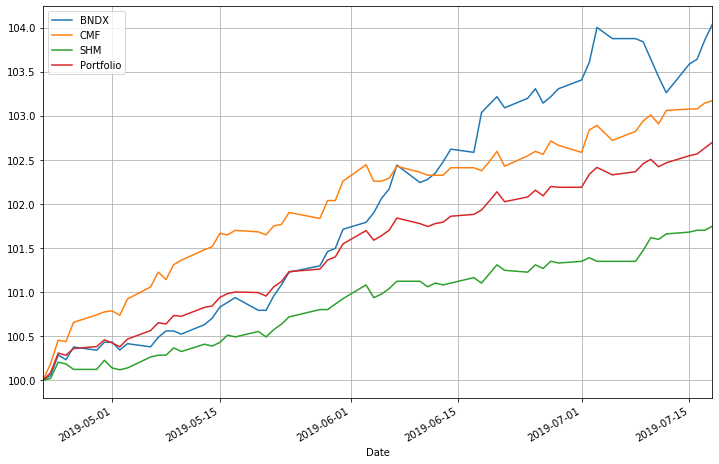

In [6]:
bounds = .04, .08
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(backlogs_pos_threshold=.8, _lambda=2, bounds=bounds)
quote.setup_mask(['BNDX', 'SHM', 'CMF'])
sd.update(quote.optimize_portfolio(_lambda=2, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=2, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)